# Chicago Weather Analysis
## The influence of Weather on the crime rate of Chicago 

### Contents
- Data Preparation
- Surronding Game Weather
- After Game Weather
- Good Weather
- Bad Weather
- Comparisons

In [1]:
import os.path
import datetime
import pylab
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
if not os.path.exists('../../data/prep/chiWea_prep.csv' ):
    print("Missing dataset file")

In [3]:
ch = pd.read_csv( '../../data/prep/chiWea_prep.csv', index_col="Date", parse_dates=True)
dch = pd.read_csv( '../../data/prep/chiWea_dom_prep.csv', index_col="Date", parse_dates=True)

In [4]:
ch.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type
Date,,,,,,,,,,
2012-10-02 01:00:00,0.0,overcast clouds,12.254624,2,2,3,7,Moderate,NFL,Vandalism
2012-10-02 01:00:00,0.0,overcast clouds,12.254624,2,2,3,7,Moderate,NFL,Vandalism
2012-10-02 01:00:00,0.0,overcast clouds,12.254624,2,2,3,7,Moderate,NFL,Domestic
2012-10-02 01:00:00,0.0,overcast clouds,12.254624,2,2,3,7,Moderate,NFL,Domestic
2012-10-02 01:00:00,0.0,overcast clouds,12.254624,2,2,3,7,Moderate,NFL,Assault


In [5]:
dch.head()

,Overall,Weather,Domestic,Primary Type
Date,,,,
2012-10-02 02:00:00,7,Moderate,NFL,Vandalism
2012-10-02 02:00:00,7,Moderate,NFL,Vandalism
2012-10-02 02:00:00,7,Moderate,NFL,Vandalism
2012-10-02 02:00:00,7,Moderate,NFL,Vandalism
2012-10-02 02:00:00,7,Moderate,NFL,Vandalism


## 2 hours before and 5 hours after

In [6]:
ch1 = ch.groupby('Primary Type')[('Primary Type')].count()
ch1.sort_values(ascending=False)

Primary Type
Assault      8591
Vandalism    7845
Domestic     7648
Name: Primary Type, dtype: int64

In [7]:
ch.groupby('Primary Type')[('Primary Type')].size() * 100 / len(ch)

Primary Type
Assault      35.670985
Domestic     31.755522
Vandalism    32.573493
Name: Primary Type, dtype: float64

In [8]:
ass1 = ch.groupby('Primary Type')[('Primary Type')].size() * 100 / len(ch)

Text(0.5,1,'Total crime percentage around Games')

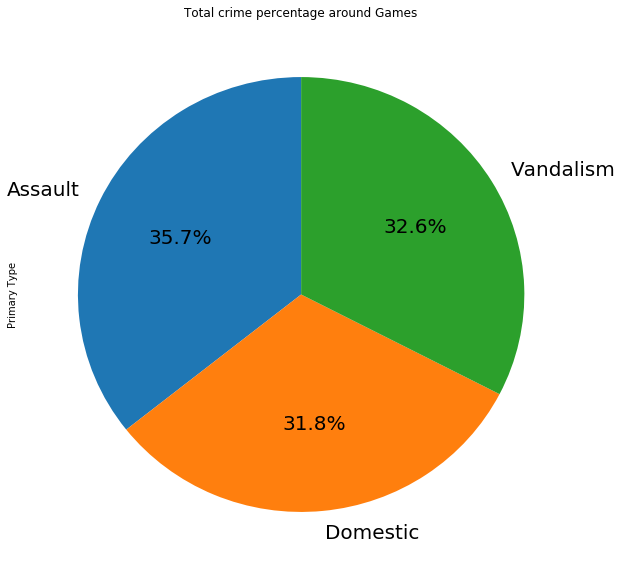

In [9]:
ass1.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Total crime percentage around Games')

# 7 hours after

In [10]:
dch1 = dch.groupby('Primary Type')[('Primary Type')].count()
dch1.sort_values(ascending=False)

Primary Type
Assault      8025
Vandalism    7322
Domestic     7222
Name: Primary Type, dtype: int64

In [11]:
dch.groupby('Primary Type')[('Primary Type')].size() * 100 / len(dch)

Primary Type
Assault      35.557623
Domestic     31.999646
Vandalism    32.442731
Name: Primary Type, dtype: float64

In [12]:
dome = dch.groupby('Primary Type')[('Primary Type')].size() * 100 / len(dch)

Text(0.5,1,'Total crime percentage in 7 hours after game')

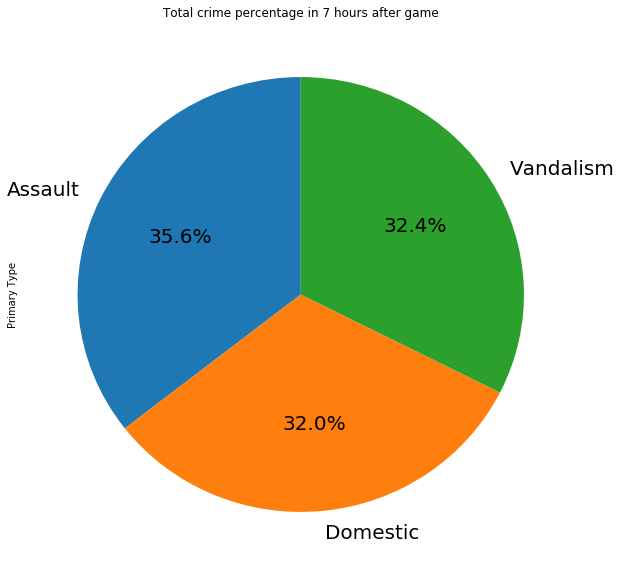

In [13]:
dome.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Total crime percentage in 7 hours after game')

# Good

In [14]:
good = ch[ch["Weather"] == "Good"]

In [15]:
good1 = good.groupby('Primary Type')[('Primary Type')].count()
good1.sort_values(ascending=False)

Primary Type
Assault      637
Vandalism    464
Domestic     408
Name: Primary Type, dtype: int64

In [16]:
good.groupby('Primary Type')[('Primary Type')].size()*100/len(good)

Primary Type
Assault      42.213386
Domestic     27.037773
Vandalism    30.748840
Name: Primary Type, dtype: float64

In [17]:
gd = good.groupby('Primary Type')[('Primary Type')].size()*100/len(good)

Text(0.5,1,'Good weather crime percentage surrounding game')

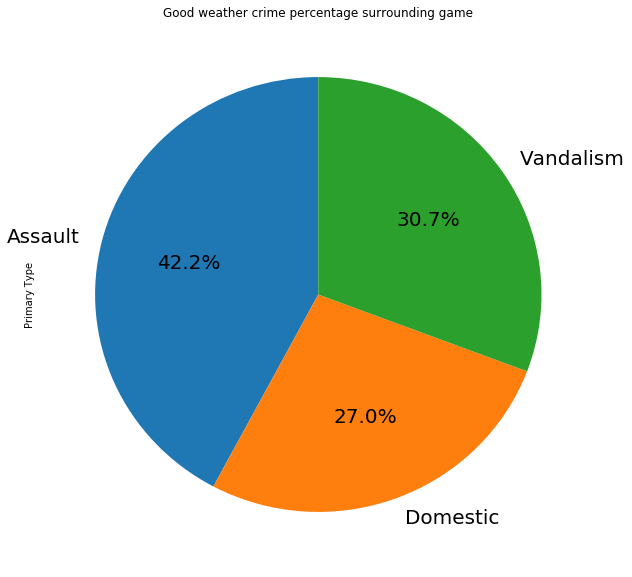

In [18]:
gd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Good weather crime percentage surrounding game')

In [19]:
good.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type
Date,,,,,,,,,,
2012-11-11 12:00:00,1.0,sky is clear,12.08,3,2,3,8,Good,NBA,Vandalism
2012-11-11 12:00:00,1.0,sky is clear,12.08,3,2,3,8,Good,NBA,Vandalism
2012-11-11 12:00:00,1.0,sky is clear,12.08,3,2,3,8,Good,NBA,Vandalism
2012-11-11 12:00:00,1.0,sky is clear,12.08,3,2,3,8,Good,NBA,Vandalism
2012-11-11 12:00:00,1.0,sky is clear,12.08,3,2,3,8,Good,NBA,Vandalism


In [20]:
good.groupby('Overall')[('Weather')].count()

Overall
8    1319
9     190
Name: Weather, dtype: int64

In [21]:
conditions = [
    (good['Overall'] == 9)]
choices = ['Very good']
good['Heat'] = np.select(conditions, choices, default='Good')

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [22]:
good.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type,Heat
Date,,,,,,,,,,,
2012-11-11 12:00:00,1.0,sky is clear,12.08,3,2,3,8,Good,NBA,Vandalism,Good
2012-11-11 12:00:00,1.0,sky is clear,12.08,3,2,3,8,Good,NBA,Vandalism,Good
2012-11-11 12:00:00,1.0,sky is clear,12.08,3,2,3,8,Good,NBA,Vandalism,Good
2012-11-11 12:00:00,1.0,sky is clear,12.08,3,2,3,8,Good,NBA,Vandalism,Good
2012-11-11 12:00:00,1.0,sky is clear,12.08,3,2,3,8,Good,NBA,Vandalism,Good


In [23]:
vg = good[good["Heat"] == "Very good"]

In [24]:
vg1 = vg.groupby('Primary Type')[('Primary Type')].count()
vg1.sort_values(ascending=False)

Primary Type
Assault      84
Vandalism    54
Domestic     52
Name: Primary Type, dtype: int64

In [25]:
vg.groupby('Primary Type')[('Primary Type')].size()*100/len(vg)

Primary Type
Assault      44.210526
Domestic     27.368421
Vandalism    28.421053
Name: Primary Type, dtype: float64

In [26]:
wvg = vg.groupby('Primary Type')[('Primary Type')].size()*100/len(vg)

Text(0.5,1,'Very good weather crime percentage surrounding game')

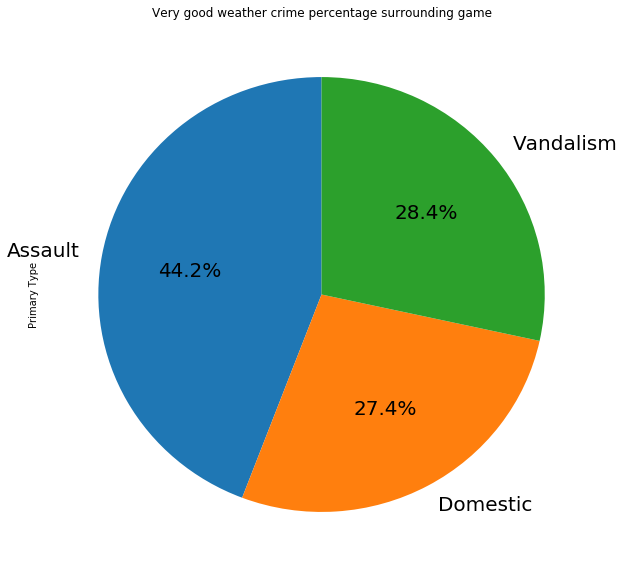

In [27]:
wvg.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very good weather crime percentage surrounding game')

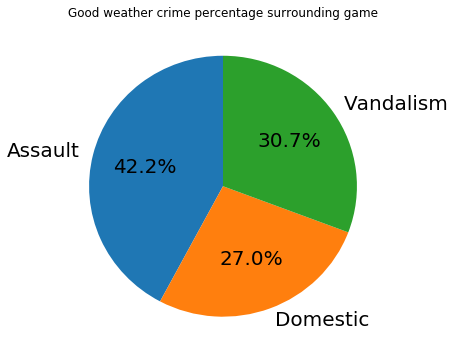

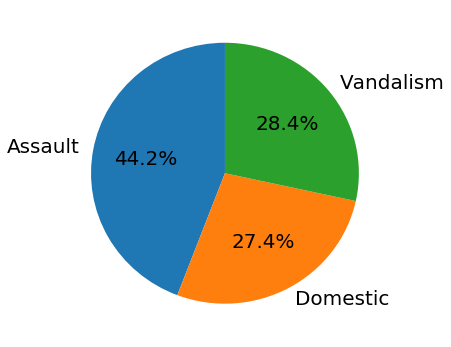

In [28]:
plt.subplot()
gd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (6, 6))
plt.title('Good weather crime percentage surrounding game')
pylab.ylabel('')
plt.show()

wvg.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (6, 6))
pylab.ylabel('')
plt.show()

### Good Weather and Domestic violence

In [29]:
dgood = dch[dch["Weather"] == "Good"]

In [30]:
dgood1 = dgood.groupby('Primary Type')[('Primary Type')].count()
dgood1.sort_values(ascending=False)

Primary Type
Assault      600
Vandalism    445
Domestic     388
Name: Primary Type, dtype: int64

In [31]:
dgood.groupby('Primary Type')[('Primary Type')].size()*100/len(dgood)

Primary Type
Assault      41.870202
Domestic     27.076064
Vandalism    31.053733
Name: Primary Type, dtype: float64

In [32]:
dgd = dgood.groupby('Primary Type')[('Primary Type')].size()*100/len(dgood)

Text(0.5,1,'Good weather crime percentage after game')

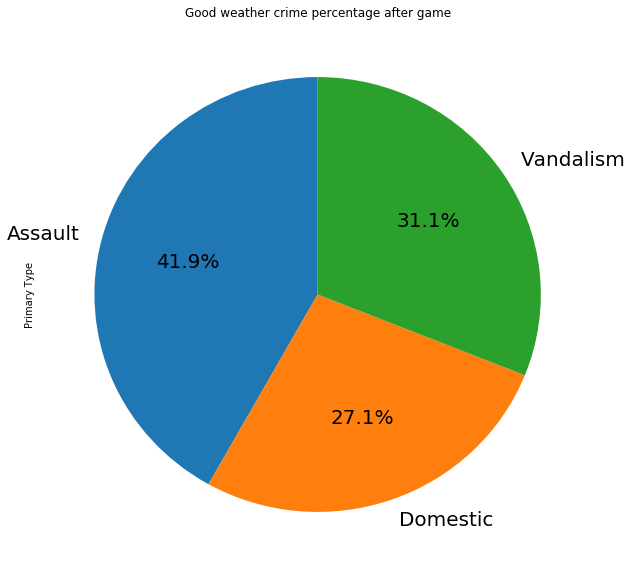

In [33]:
dgd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Good weather crime percentage after game')

In [34]:
dgood.head()

,Overall,Weather,Domestic,Primary Type
Date,,,,
2012-11-12 19:00:00,8,Good,NBA,Vandalism
2012-11-12 19:00:00,8,Good,NBA,Vandalism
2012-11-12 19:00:00,8,Good,NBA,Domestic
2012-11-12 19:00:00,8,Good,NBA,Domestic
2012-11-12 19:00:00,8,Good,NBA,Domestic


In [35]:
dgood.groupby('Overall')[('Weather')].count()

Overall
8    1214
9     219
Name: Weather, dtype: int64

In [36]:
conditions = [
    (dgood['Overall'] == 9)]
choices = ['Very good']
dgood['Heat'] = np.select(conditions, choices, default='Good')

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
dgood.head()

,Overall,Weather,Domestic,Primary Type,Heat
Date,,,,,
2012-11-12 19:00:00,8,Good,NBA,Vandalism,Good
2012-11-12 19:00:00,8,Good,NBA,Vandalism,Good
2012-11-12 19:00:00,8,Good,NBA,Domestic,Good
2012-11-12 19:00:00,8,Good,NBA,Domestic,Good
2012-11-12 19:00:00,8,Good,NBA,Domestic,Good


In [38]:
dvg = dgood[dgood["Heat"] == "Very good"]

In [39]:
dvg1 = dvg.groupby('Primary Type')[('Primary Type')].count()
dvg1.sort_values(ascending=False)

Primary Type
Assault      97
Domestic     62
Vandalism    60
Name: Primary Type, dtype: int64

In [40]:
dvg.groupby('Primary Type')[('Primary Type')].size()*100/len(dvg)

Primary Type
Assault      44.292237
Domestic     28.310502
Vandalism    27.397260
Name: Primary Type, dtype: float64

In [41]:
wdvg = dvg.groupby('Primary Type')[('Primary Type')].size()*100/len(dvg)

Text(0.5,1,'Very good weather crime percentage after game')

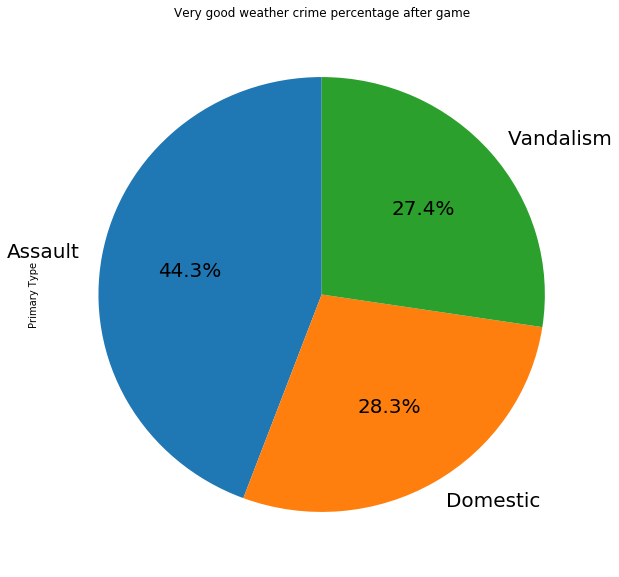

In [42]:
wdvg.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very good weather crime percentage after game')

# Bad

In [43]:
bad = ch[ch["Weather"] == "Bad"]

In [44]:
bad1 = bad.groupby('Primary Type')[('Primary Type')].count()
bad1.sort_values(ascending=False)

Primary Type
Assault      6120
Vandalism    5849
Domestic     5714
Name: Primary Type, dtype: int64

In [45]:
bad.groupby('Primary Type')[('Primary Type')].size() * 100 / len(bad)

Primary Type
Assault      34.609512
Domestic     32.313521
Vandalism    33.076967
Name: Primary Type, dtype: float64

In [46]:
bd = bad.groupby('Primary Type')[('Primary Type')].size() * 100 / len(bad)

Text(0.5,1,'Bad weather crime percentage surrounding game')

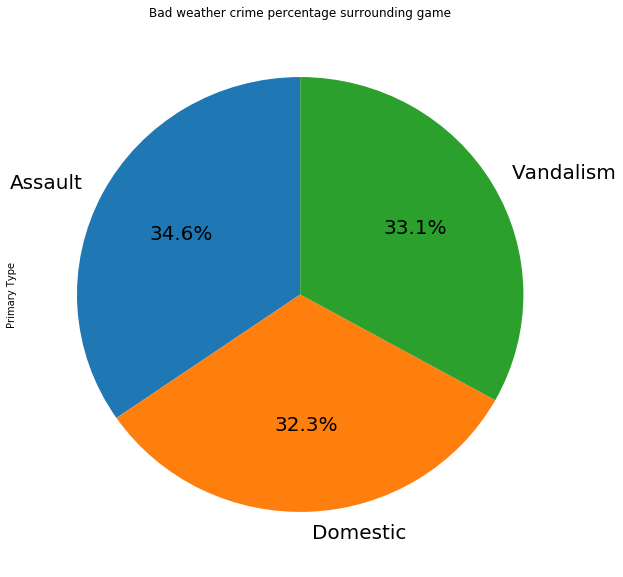

In [47]:
bd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Bad weather crime percentage surrounding game')

In [48]:
bad.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type
Date,,,,,,,,,,
2012-10-28 16:00:00,5.0,scattered clouds,7.04,2,0,2,4,Bad,NFL,Vandalism
2012-10-28 16:00:00,5.0,scattered clouds,7.04,2,0,2,4,Bad,NFL,Vandalism
2012-10-28 16:00:00,5.0,scattered clouds,7.04,2,0,2,4,Bad,NFL,Vandalism
2012-10-28 16:00:00,5.0,scattered clouds,7.04,2,0,2,4,Bad,NFL,Domestic
2012-10-28 16:00:00,5.0,scattered clouds,7.04,2,0,2,4,Bad,NFL,Domestic


In [49]:
conditions = [
    (bad['Overall'] < 3)]
choices = ['Very bad']
bad['Cold'] = np.select(conditions, choices, default='Bad')

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [50]:
bad.head()

,Wind Speed,Description,Celcius,DescRate,TempRate,WindRate,Overall,Weather,Game Day,Primary Type,Cold
Date,,,,,,,,,,,
2012-10-28 16:00:00,5.0,scattered clouds,7.04,2,0,2,4,Bad,NFL,Vandalism,Bad
2012-10-28 16:00:00,5.0,scattered clouds,7.04,2,0,2,4,Bad,NFL,Vandalism,Bad
2012-10-28 16:00:00,5.0,scattered clouds,7.04,2,0,2,4,Bad,NFL,Vandalism,Bad
2012-10-28 16:00:00,5.0,scattered clouds,7.04,2,0,2,4,Bad,NFL,Domestic,Bad
2012-10-28 16:00:00,5.0,scattered clouds,7.04,2,0,2,4,Bad,NFL,Domestic,Bad


In [51]:
vb = bad[bad["Cold"] == "Very bad"]

In [52]:
vb1 = vb.groupby('Primary Type')[('Primary Type')].count()
vb1.sort_values(ascending=False)

Primary Type
Assault      1210
Domestic     1184
Vandalism    1173
Name: Primary Type, dtype: int64

In [53]:
vb.groupby('Primary Type')[('Primary Type')].size()*100/len(vb)

Primary Type
Assault      33.922063
Domestic     33.193160
Vandalism    32.884777
Name: Primary Type, dtype: float64

In [54]:
wvb = vb.groupby('Primary Type')[('Primary Type')].size()*100/len(vb)

Text(0.5,1,'Very bad weather crime percentage surrounding game')

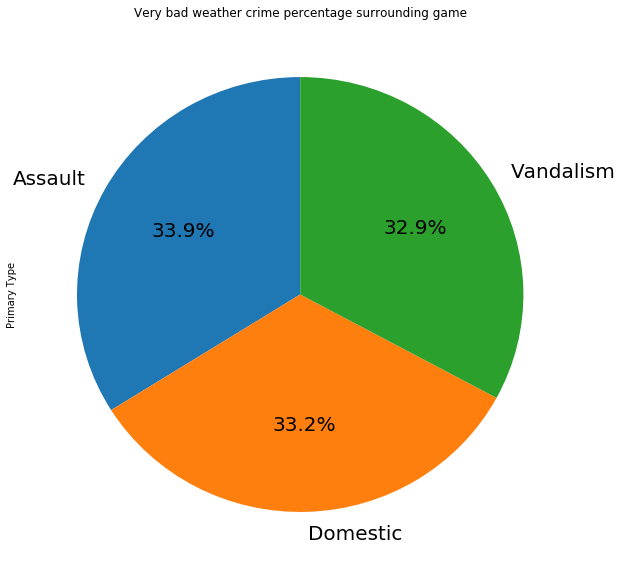

In [55]:
wvb.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very bad weather crime percentage surrounding game')

### Bad Weather and Domestic Violence

In [56]:
dbad = dch[dch["Weather"] == "Bad"]

In [57]:
dbad1 = dbad.groupby('Primary Type')[('Primary Type')].count()
dbad1.sort_values(ascending=False)

Primary Type
Assault      5680
Vandalism    5394
Domestic     5355
Name: Primary Type, dtype: int64

In [58]:
dbad.groupby('Primary Type')[('Primary Type')].size() * 100 / len(dbad)

Primary Type
Assault      34.573011
Domestic     32.594802
Vandalism    32.832187
Name: Primary Type, dtype: float64

In [59]:
wdb = dbad.groupby('Primary Type')[('Primary Type')].size() * 100 / len(dbad)

Text(0.5,1,'Very bad weather crime percentage after game')

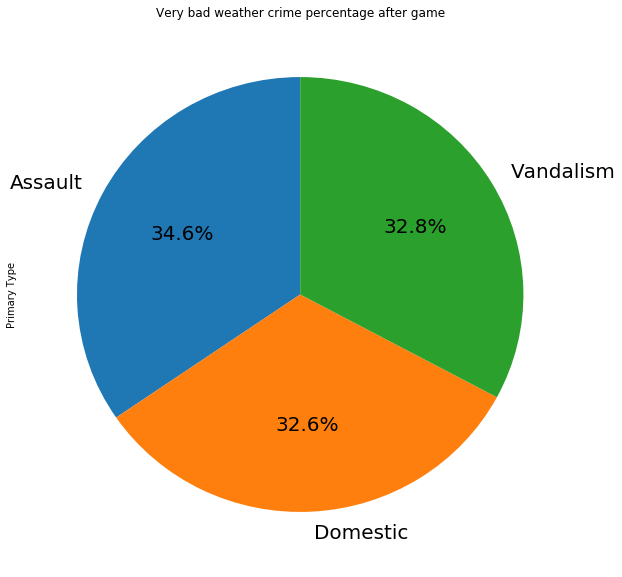

In [60]:
wdb.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very bad weather crime percentage after game')

In [61]:
dbad.head()

,Overall,Weather,Domestic,Primary Type
Date,,,,
2012-10-28 18:00:00,4,Bad,NFL,Vandalism
2012-10-28 18:00:00,4,Bad,NFL,Vandalism
2012-10-28 18:00:00,4,Bad,NFL,Vandalism
2012-10-28 18:00:00,4,Bad,NFL,Vandalism
2012-10-28 18:00:00,4,Bad,NFL,Vandalism


In [62]:
conditions = [
    (dbad['Overall'] < 3)]
choices = ['Very bad']
dbad['Cold'] = np.select(conditions, choices, default='Bad')

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [63]:
dbad.head()

,Overall,Weather,Domestic,Primary Type,Cold
Date,,,,,
2012-10-28 18:00:00,4,Bad,NFL,Vandalism,Bad
2012-10-28 18:00:00,4,Bad,NFL,Vandalism,Bad
2012-10-28 18:00:00,4,Bad,NFL,Vandalism,Bad
2012-10-28 18:00:00,4,Bad,NFL,Vandalism,Bad
2012-10-28 18:00:00,4,Bad,NFL,Vandalism,Bad


In [64]:
dvb = dbad[dbad["Cold"] == "Very bad"]

In [65]:
dvb1 = dvb.groupby('Primary Type')[('Primary Type')].count()
dvb1.sort_values(ascending=False)

Primary Type
Assault      1160
Domestic     1074
Vandalism    1066
Name: Primary Type, dtype: int64

In [66]:
dvb.groupby('Primary Type')[('Primary Type')].size()*100/len(dvb)

Primary Type
Assault      35.151515
Domestic     32.545455
Vandalism    32.303030
Name: Primary Type, dtype: float64

In [67]:
wdvb = dvb.groupby('Primary Type')[('Primary Type')].size()*100/len(dvb)

Text(0.5,1,'Very bad weather crime percentage after game')

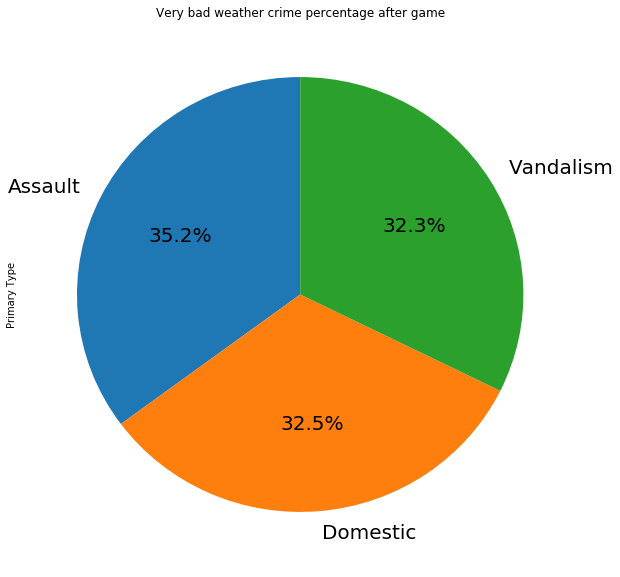

In [68]:
wdvb.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Very bad weather crime percentage after game')

# Moderate

In [69]:
mod = ch[ch["Weather"] == "Moderate"]

In [70]:
mod1 = mod.groupby('Primary Type')[('Weather')].count()
mod1.sort_values(ascending=False)

Primary Type
Assault      1834
Vandalism    1532
Domestic     1526
Name: Weather, dtype: int64

In [71]:
mod.groupby('Primary Type')[('Weather')].size() * 100 / len(mod)

Primary Type
Assault      37.489779
Domestic     31.193786
Vandalism    31.316435
Name: Weather, dtype: float64

In [72]:
md = mod.groupby('Primary Type')[('Weather')].size() * 100 / len(mod)

Text(0.5,1,'Moderate weather crime percentage surrounding game')

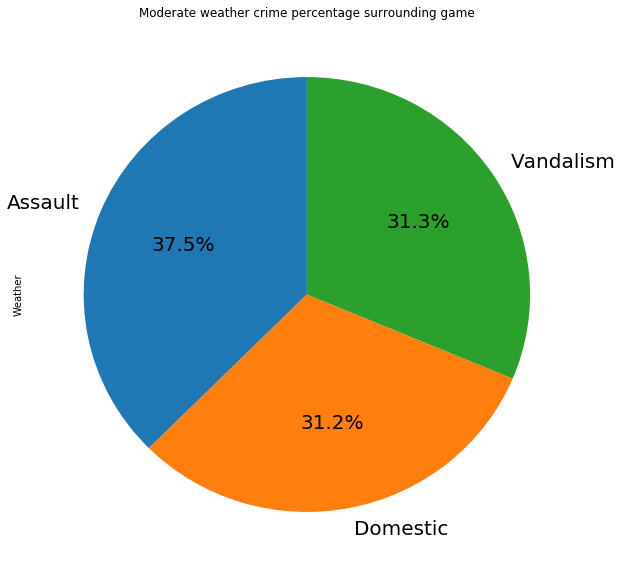

In [73]:
md.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (10, 10))
plt.title('Moderate weather crime percentage surrounding game')

# Comparison

### Surrounding Game (Focusing on Assault and Vandalism)

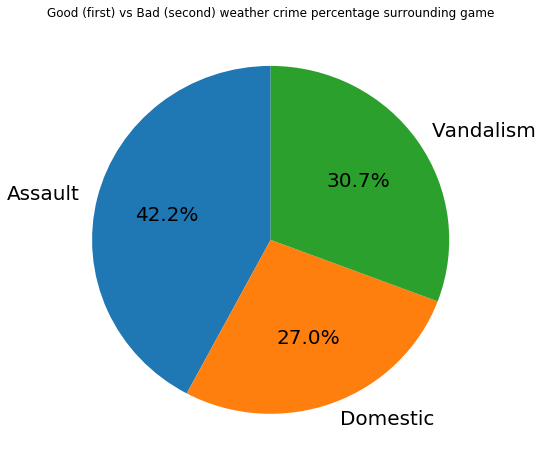

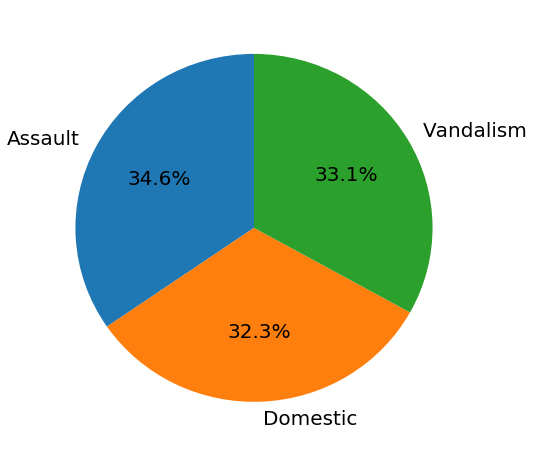

In [74]:
gd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (8, 8))
plt.title('Good (first) vs Bad (second) weather crime percentage surrounding game')
pylab.ylabel('')
plt.show()

bd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (8, 8))
pylab.ylabel('')
plt.show()
pylab.savefig('test.png', bbox_inches='tight')


### After Game (Focusing on Domestic Violence)

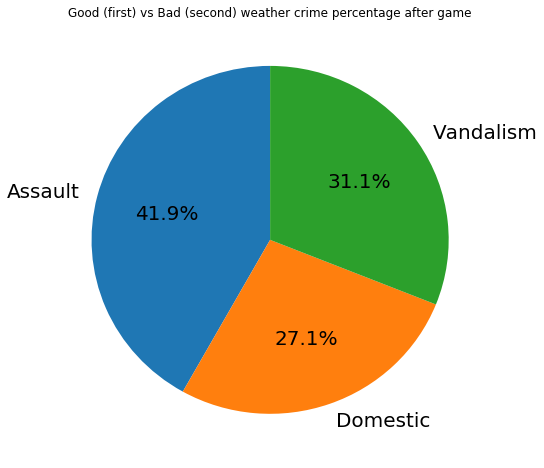

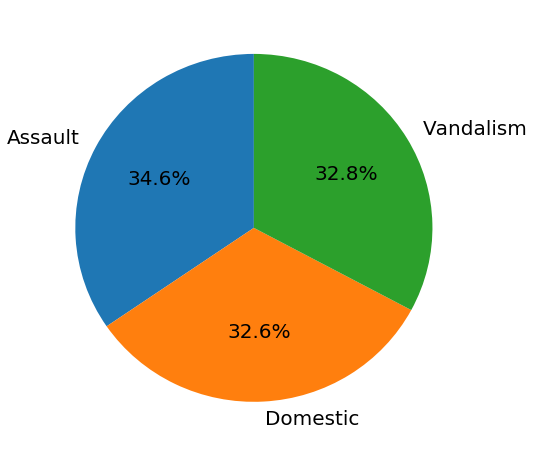

In [75]:
dgd.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (8, 8))
plt.title('Good (first) vs Bad (second) weather crime percentage after game')
pylab.ylabel(' ')
plt.show()

wdb.plot(kind='pie', autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=20, figsize = (8, 8))
pylab.ylabel(' ')
plt.show()


### Domestic Overall

In [76]:
r9 = dch[dch["Overall"] == 9]
r9.groupby('Primary Type')[('Weather')].size() * 100 / len(r9)

Primary Type
Assault      44.292237
Domestic     28.310502
Vandalism    27.397260
Name: Weather, dtype: float64

In [77]:
r8 = dch[dch["Overall"] == 8]
r8.groupby('Primary Type')[('Weather')].size() * 100 / len(r8)

Primary Type
Assault      41.433278
Domestic     26.853377
Vandalism    31.713344
Name: Weather, dtype: float64

In [78]:
r7 = dch[dch["Overall"] == 7]
r7.groupby('Primary Type')[('Weather')].size() * 100 / len(r7)

Primary Type
Assault      38.824250
Domestic     29.944887
Vandalism    31.230863
Name: Weather, dtype: float64

In [79]:
r6 = dch[dch["Overall"] == 6]
r6.groupby('Primary Type')[('Weather')].size() * 100 / len(r6)

Primary Type
Assault      36.141835
Domestic     32.205595
Vandalism    31.652570
Name: Weather, dtype: float64

In [80]:
r5 = dch[dch["Overall"] == 5]
r5.groupby('Primary Type')[('Weather')].size() * 100 / len(r5)

Primary Type
Assault      33.611179
Domestic     33.709242
Vandalism    32.679578
Name: Weather, dtype: float64

In [81]:
r4 = dch[dch["Overall"] == 4]
r4.groupby('Primary Type')[('Weather')].size() * 100 / len(r4)

Primary Type
Assault      34.555041
Domestic     31.815844
Vandalism    33.629115
Name: Weather, dtype: float64

In [82]:
r3 = dch[dch["Overall"] == 3]
r3.groupby('Primary Type')[('Weather')].size() * 100 / len(r3)

Primary Type
Assault      36.263736
Domestic     33.908948
Vandalism    29.827316
Name: Weather, dtype: float64

In [83]:
r2 = dch[dch["Overall"] == 2]
r2.groupby('Primary Type')[('Weather')].size() * 100 / len(r2)

Primary Type
Assault      35.151515
Domestic     32.545455
Vandalism    32.303030
Name: Weather, dtype: float64

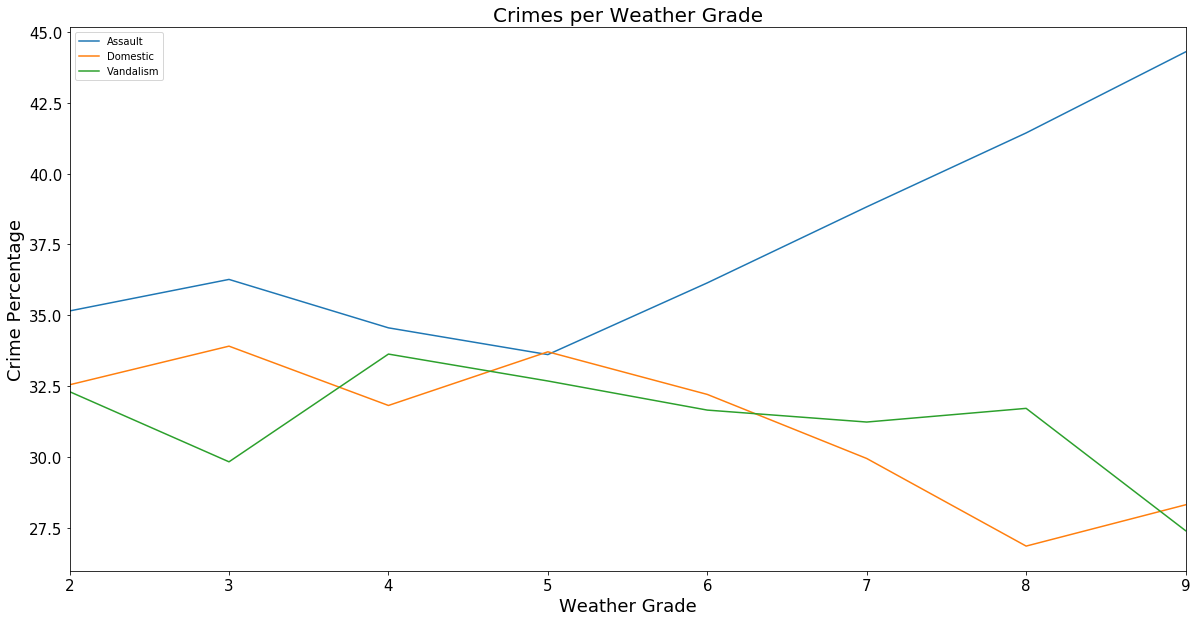

In [84]:
data = pd.DataFrame({  'Assault':[35.151515,36.263736,34.555041,33.611179,36.141835,38.824250,41.433278,44.292237], 
                     'Domestic':[32.545455,33.908948,31.815844,33.709242,32.205595,29.944887,26.853377,28.310502], 
                     'Vandalism':[32.303030,29.827316,33.629115,32.679578,31.652570,31.230863,31.713344,27.397260], }, 
                    index=range(2,10))

data.plot(figsize = (20, 10))
#ax.set(xlabel="Weather Grade", ylabel="Crime percentage")
plt.xlabel('Weather Grade', fontsize=18)
plt.ylabel('Crime Percentage', fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Crimes per Weather Grade', fontsize = 20)
plt.show()

For the most part, as the weather gets better the percentage of crimes that are of the type domestic violence decreases. Alternatevely, the percentage that are of the type assaults increases. Vandalism also decreases a significant amount. 

### Assault and Vandalism Overall

In [85]:
r9 = ch[ch["Overall"] == 9]
r9.groupby('Primary Type')[('Weather')].size() * 100 / len(r9)

Primary Type
Assault      44.210526
Domestic     27.368421
Vandalism    28.421053
Name: Weather, dtype: float64

In [86]:
r8 = ch[ch["Overall"] == 8]
r8.groupby('Primary Type')[('Weather')].size() * 100 / len(r8)

Primary Type
Assault      41.925701
Domestic     26.990144
Vandalism    31.084155
Name: Weather, dtype: float64

In [87]:
r7 = ch[ch["Overall"] == 7]
r7.groupby('Primary Type')[('Weather')].size() * 100 / len(r7)

Primary Type
Assault      39.043584
Domestic     30.629540
Vandalism    30.326877
Name: Weather, dtype: float64

In [88]:
r6 = ch[ch["Overall"] == 6]
r6.groupby('Primary Type')[('Weather')].size() * 100 / len(r6)

Primary Type
Assault      36.697531
Domestic     31.481481
Vandalism    31.820988
Name: Weather, dtype: float64

In [89]:
r5 = ch[ch["Overall"] == 5]
r5.groupby('Primary Type')[('Weather')].size() * 100 / len(r5)

Primary Type
Assault      34.270501
Domestic     33.652822
Vandalism    32.076677
Name: Weather, dtype: float64

In [90]:
r4 = ch[ch["Overall"] == 4]
r4.groupby('Primary Type')[('Weather')].size() * 100 / len(r4)

Primary Type
Assault      34.879787
Domestic     31.170714
Vandalism    33.949499
Name: Weather, dtype: float64

In [91]:
r3 = ch[ch["Overall"] == 3]
r3.groupby('Primary Type')[('Weather')].size() * 100 / len(r3)

Primary Type
Assault      36.188811
Domestic     32.342657
Vandalism    31.468531
Name: Weather, dtype: float64

In [92]:
r2 = ch[ch["Overall"] == 2]
r2.groupby('Primary Type')[('Weather')].size() * 100 / len(r2)

Primary Type
Assault      33.922063
Domestic     33.193160
Vandalism    32.884777
Name: Weather, dtype: float64

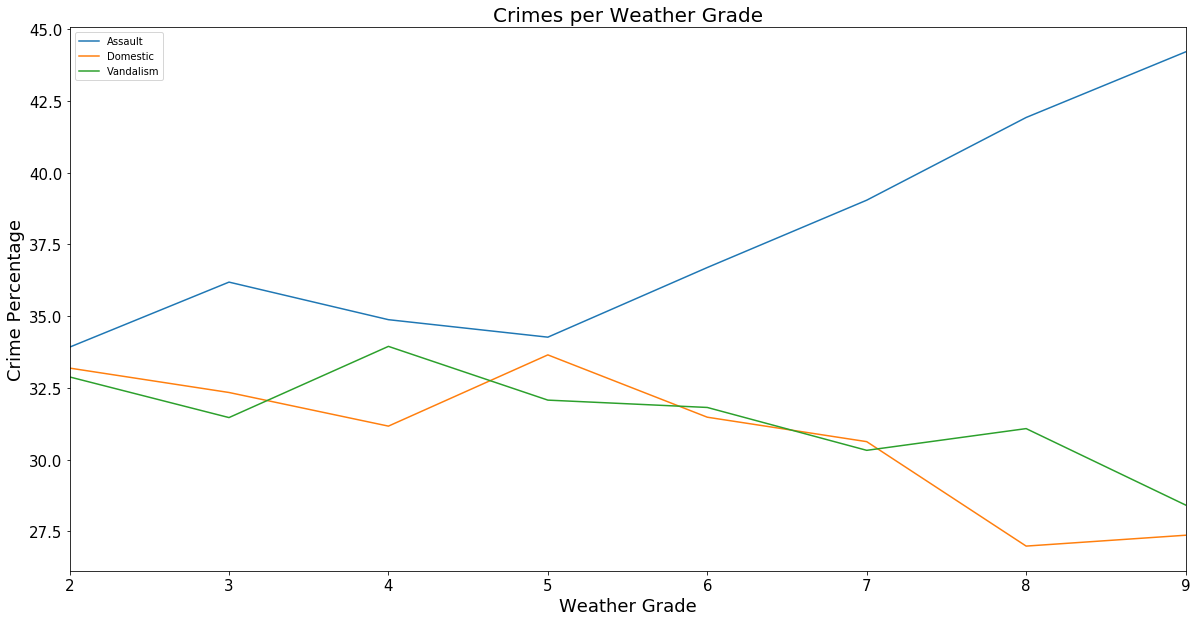

In [93]:
data = pd.DataFrame({  'Assault':[33.922063,36.188811,34.879787,34.270501,36.697531,39.043584,41.925701,44.210526], 
                     'Domestic':[33.193160,32.342657,31.170714,33.652822,31.481481,30.629540,26.990144,27.368421], 
                     'Vandalism':[32.884777,31.468531,33.949499,32.076677,31.820988,30.326877,31.084155,28.421053], }, 
                    index=range(2,10))

data.plot(figsize = (20, 10))
#ax.set(xlabel="Weather Grade", ylabel="Crime percentage")
plt.xlabel('Weather Grade', fontsize=18)
plt.ylabel('Crime Percentage', fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Crimes per Weather Grade', fontsize=20)
plt.show()

Both assault and vandalism were consistent until weather grade 5. They then parted ways. Assault went on a rapid incline, to over 42.5%, whereas vandalism dropped to below 27.5%. 